# SC1015 Mini Project : Predicting Telecom Customer Churn

##### Dataset from Kaggle https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets

### Introduction:

In [20]:
# Import basic library for EDA

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set_theme()

import warnings
warnings.filterwarnings("ignore")

In [21]:
data = pd.read_csv('churn-bigml-80.csv')
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Exploratory Data Analysis

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [23]:
# Info of numerical data
data.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [24]:
df = data['Churn']
df.value_counts()


Churn
False    2278
True      388
Name: count, dtype: int64

In [25]:
# Select only the numerical columns
data_num = data.select_dtypes(include=["float64","int64"])
data_num

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,79,415,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2
2662,192,415,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
2663,68,415,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
2664,28,510,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2


In [26]:
# drop "Area code" column which is categorical
data_int = data_num.drop(columns = ['Area code'])
data_int

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,79,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2
2662,192,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
2663,68,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
2664,28,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2


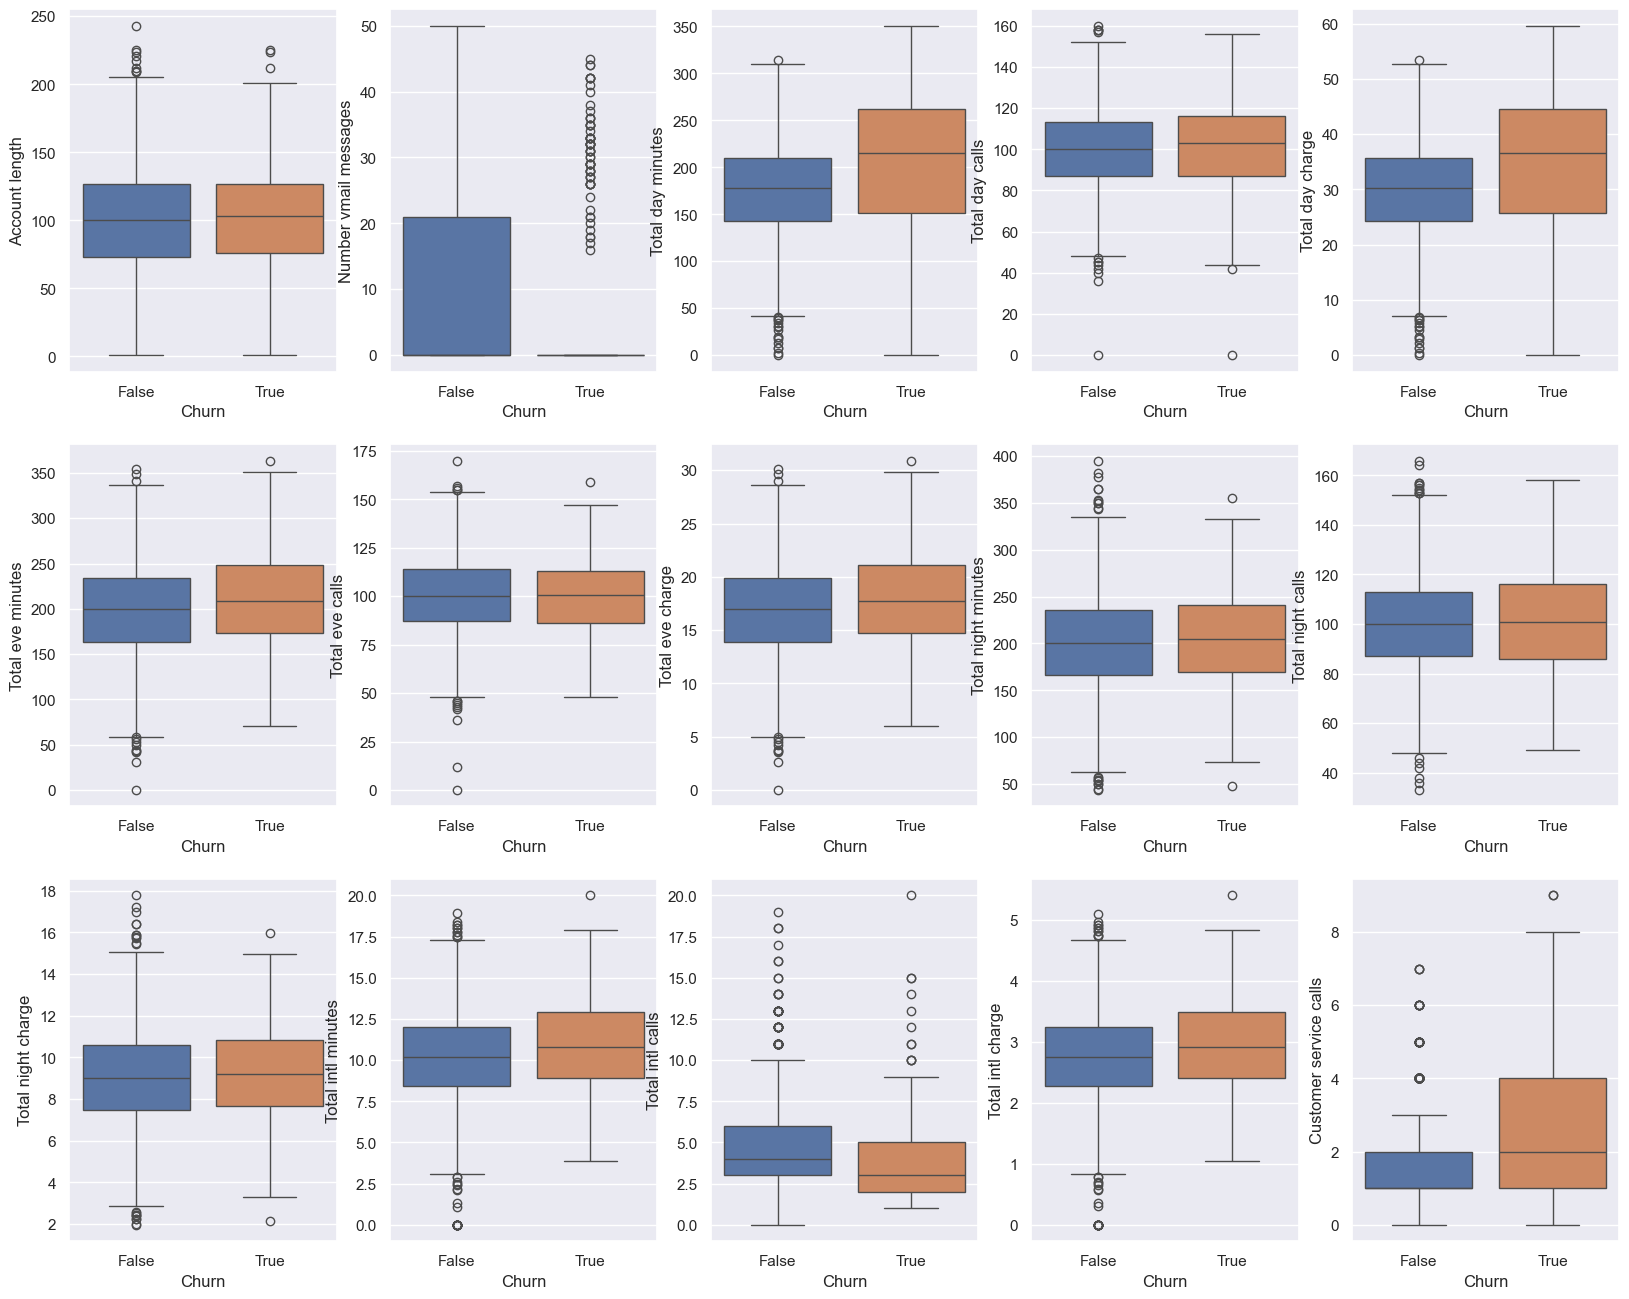

In [27]:
# Plot boxplot of numerical data against ['Churn'] to see features 
f, axes = plt.subplots(3,5, figsize=(20,16))
axes = axes.ravel()
count= 0
for var in data_int:
    sb.boxplot(x=data['Churn'], y=data[var], ax = axes[count], palette="deep")
    count +=1

In [28]:
'''
Significant variables: 

- Total day minutes
- Total day charge
- Total eve minutes
- Total eve charge
- Total intl minutes
- Total intl calls
- Total intl charge
- Customer service calls

'''

'\nSignificant variables: \n\n- Total day minutes\n- Total day charge\n- Total eve minutes\n- Total eve charge\n- Total intl minutes\n- Total intl calls\n- Total intl charge\n- Customer service calls\n\n'

In [29]:
data_cat = pd.DataFrame(data[ ['Area code','International plan', 'Voice mail plan', 'State'] ])
data_cat

,Area code,International plan,Voice mail plan,State
0,415,No,Yes,KS
1,415,No,Yes,OH
2,415,No,No,NJ
3,408,Yes,No,OH
4,415,Yes,No,OK
...,...,...,...,...
2661,415,No,No,SC
2662,415,No,Yes,AZ
2663,415,No,No,WV
2664,510,No,No,RI


In [30]:
data_cat = data_cat.astype('category')
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Area code           2666 non-null   category
 1   International plan  2666 non-null   category
 2   Voice mail plan     2666 non-null   category
 3   State               2666 non-null   category
dtypes: category(4)
memory usage: 13.4 KB


In [31]:
data_cat.describe()

,Area code,International plan,Voice mail plan,State
count,2666,2666,2666,2666
unique,3,2,2,51
top,415,No,No,WV
freq,1318,2396,1933,88


<Axes: xlabel='State', ylabel='count'>

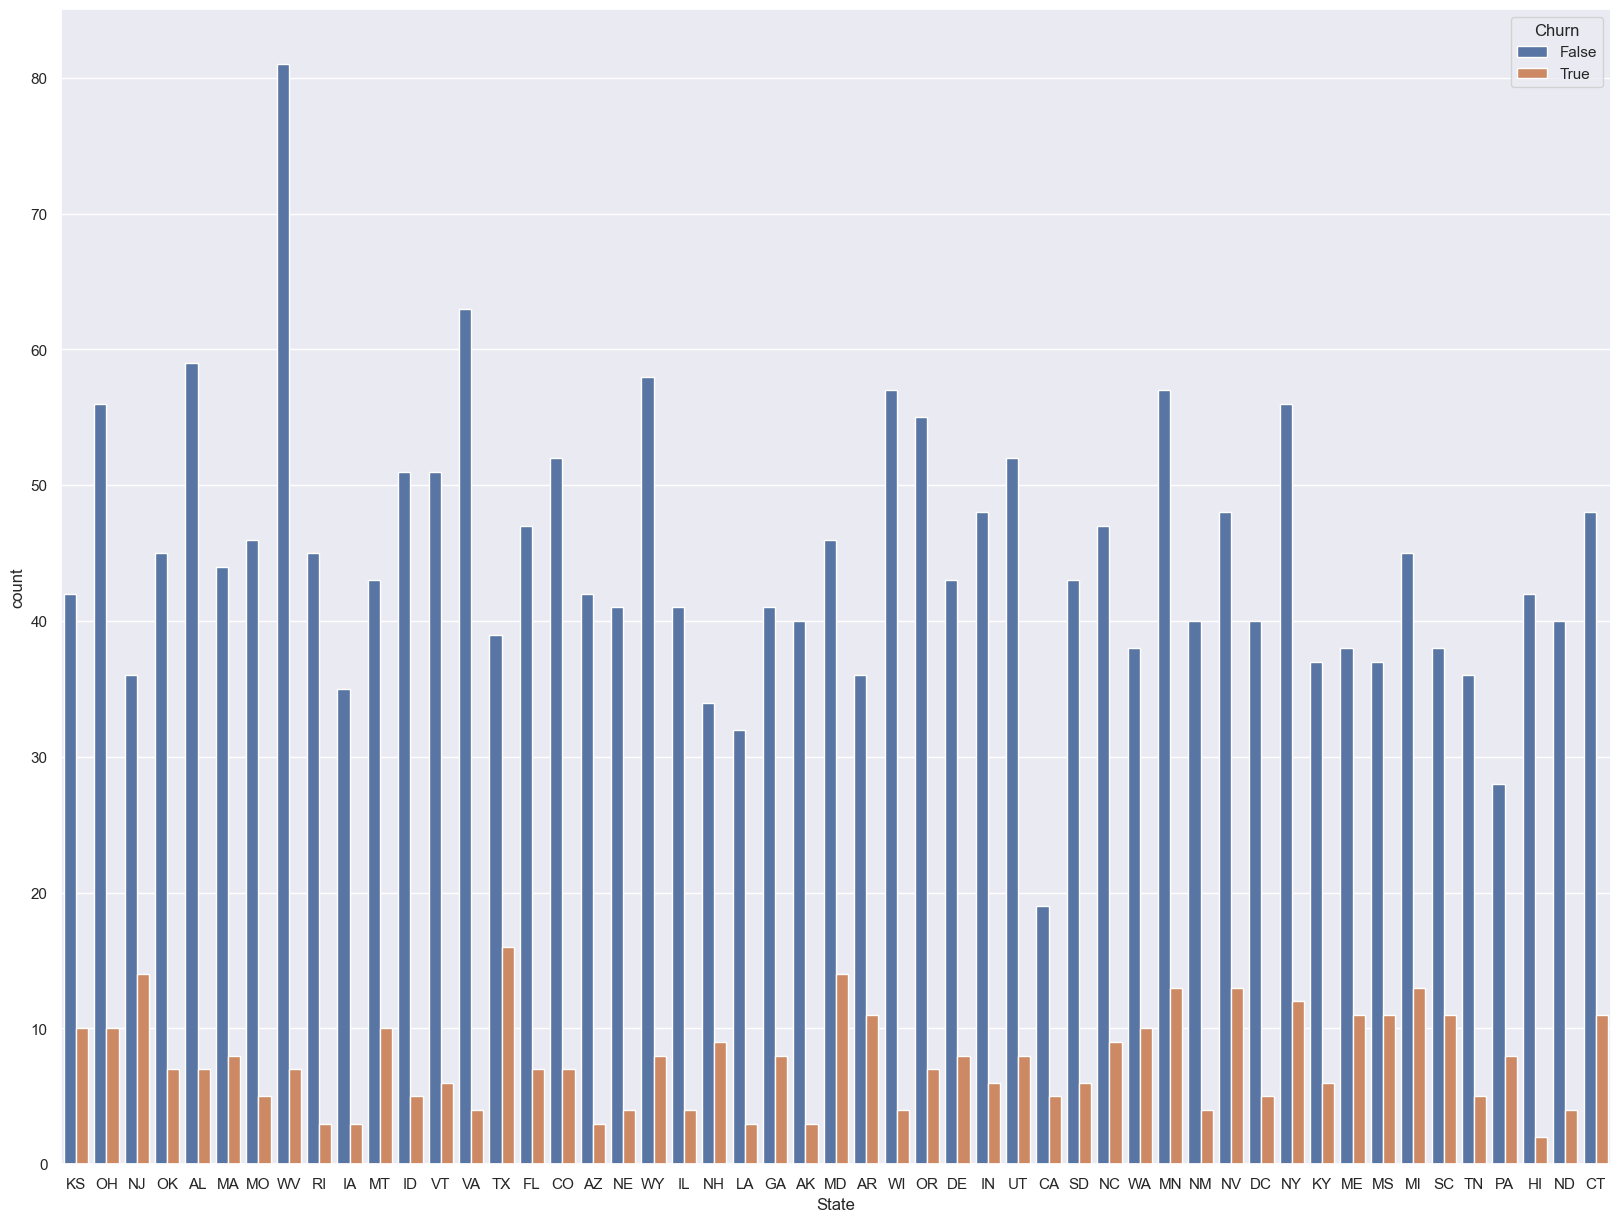

In [32]:
fig, axes = plt.subplots(figsize=(20,15))
sb.countplot( x = data['State'], hue = data['Churn'] )

In [33]:
'''
NJ, TX , MD seem to have highest churn
'''

'\nNJ, TX , MD seem to have highest churn\n'

<Axes: xlabel='International plan', ylabel='count'>

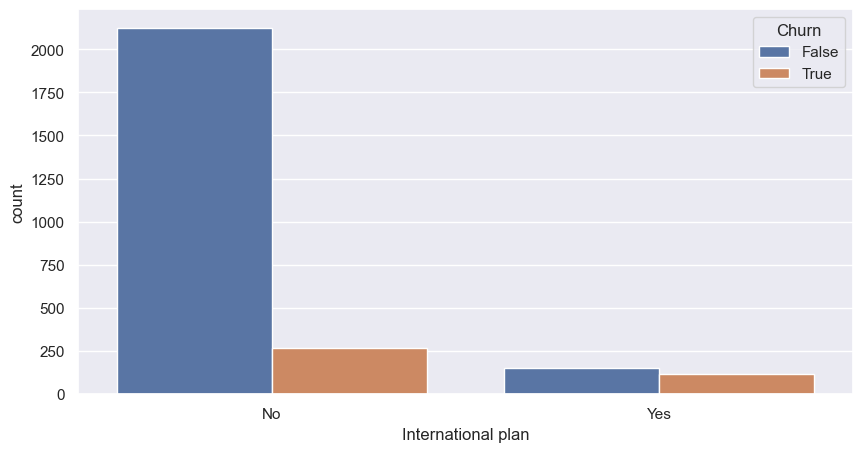

In [34]:
fig, axes = plt.subplots(figsize=(10,5))
sb.countplot( x = data['International plan'], hue = data['Churn'] )

<Axes: xlabel='Voice mail plan', ylabel='count'>

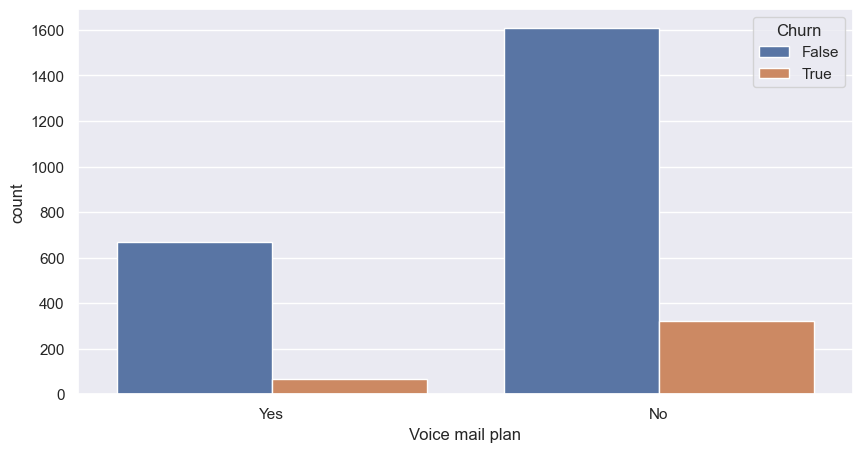

In [35]:
fig, axes = plt.subplots(figsize=(10,5))
sb.countplot( x = data['Voice mail plan'], hue = data['Churn'] )

#### Variables to test: <br>-Total day minutes  <br>-Total eve minutes<br>-Total night minutes <br>-Customer services calls <br>-Account Length <br>-International plan

In [36]:
intl_plan = data['International plan'].copy(deep = True)
intl_plan = intl_plan.map({'Yes':1,'No':0})
data['International plan'] = intl_plan
data['International plan'].astype('category')

0       0
1       0
2       0
3       1
4       1
       ..
2661    0
2662    0
2663    0
2664    0
2665    0
Name: International plan, Length: 2666, dtype: category
Categories (2, int64): [0, 1]

In [37]:
col = pd.DataFrame(data[['Total day minutes' , 'Total eve minutes' , 'Total night minutes', 'Customer service calls', 'Account length','International plan']])
col

,Total day minutes,Total eve minutes,Total night minutes,Customer service calls,Account length,International plan
0,265.1,197.4,244.7,1,128,0
1,161.6,195.5,254.4,1,107,0
2,243.4,121.2,162.6,0,137,0
3,299.4,61.9,196.9,2,84,1
4,166.7,148.3,186.9,3,75,1
...,...,...,...,...,...,...
2661,134.7,189.7,221.4,2,79,0
2662,156.2,215.5,279.1,2,192,0
2663,231.1,153.4,191.3,3,68,0
2664,180.8,288.8,191.9,2,28,0


In [38]:
# Response variable
churn = pd.DataFrame(data['Churn'])